In [2]:
import pandas as pd

# 파일 경로 설정
movies_file = "movies.csv"
ratings_file = "ratings.csv"

# 데이터 로드
movies = pd.read_csv(movies_file)
ratings = pd.read_csv(ratings_file)

data = pd.merge(ratings, movies, on="movieId")

# 데이터 확인
print(movies.head())
print(ratings.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [3]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
movies_file = "movies.csv"
ratings_file = "ratings.csv"

movies = pd.read_csv(movies_file)
ratings = pd.read_csv(ratings_file)
data = pd.merge(ratings, movies, on="movieId")

# 앱 제목
st.title("MovieLens Dashboard")
st.sidebar.title("Filters")

# 필터: 영화 장르 선택
genres = data['genres'].str.get_dummies(sep='|').columns
selected_genre = st.sidebar.selectbox("Select a Genre", ["All"] + list(genres))

# 필터 데이터 적용
if selected_genre != "All":
    data = data[data['genres'].str.contains(selected_genre, na=False)]

# 데이터 통계
st.header("Summary Statistics")
st.write(data.describe())

# 영화별 평점 분포
st.header("Ratings Distribution")
fig, ax = plt.subplots()
data['rating'].hist(bins=10, ax=ax)
ax.set_title("Ratings Distribution")
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
st.pyplot(fig)

# 가장 인기 있는 영화
st.header("Top 10 Movies")
top_movies = (
    data.groupby("title")["rating"]
    .agg(["mean", "count"])
    .rename(columns={"mean": "Average Rating", "count": "Number of Ratings"})
    .sort_values(by="Number of Ratings", ascending=False)
    .head(10)
)
st.write(top_movies)


ModuleNotFoundError: No module named 'streamlit'

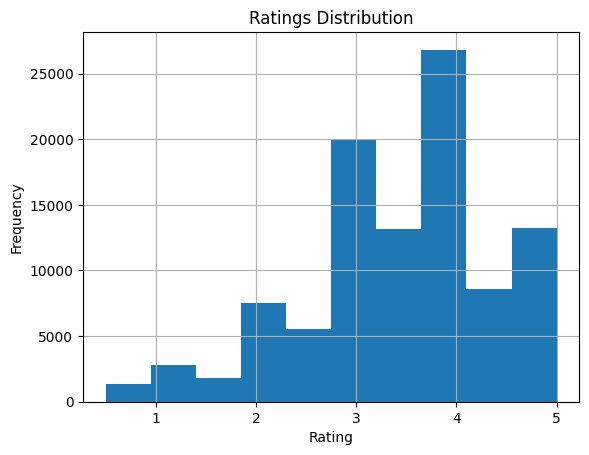

In [ ]:
import matplotlib.pyplot as plt

# 평점 분포 시각화
ratings['rating'].hist(bins=10)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# 영화별 평균 평점 및 평점 수 계산
movie_ratings = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
movie_ratings.rename(columns={'mean': 'avg_rating', 'count': 'num_ratings'}, inplace=True)

# 평균 평점이 높은 영화 확인
top_movies = movie_ratings.sort_values(by='avg_rating', ascending=False).head(10)
print(top_movies)


      movieId  avg_rating  num_ratings
7638    88448         5.0            1
8089   100556         5.0            1
9065   143031         5.0            1
9076   143511         5.0            1
9078   143559         5.0            1
4245     6201         5.0            1
8136   102217         5.0            1
8130   102084         5.0            1
4240     6192         5.0            1
9104   145994         5.0            1


In [ ]:
# 영화 정보와 평점 데이터 병합
movie_details = pd.merge(movies, movie_ratings, on='movieId')
print(movie_details.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  avg_rating  num_ratings  
0  Adventure|Animation|Children|Comedy|Fantasy    3.920930          215  
1                   Adventure|Children|Fantasy    3.431818          110  
2                               Comedy|Romance    3.259615           52  
3                         Comedy|Drama|Romance    2.357143            7  
4                                       Comedy    3.071429           49  


In [ ]:
# 평점 수 기준 상위 영화 추천
popular_movies = movie_details[movie_details['num_ratings'] > 50]
popular_movies = popular_movies.sort_values(by='avg_rating', ascending=False)

# 추천 영화 출력
print(popular_movies[['title', 'avg_rating', 'num_ratings']].head(10))


                                                  title  avg_rating  \
277                    Shawshank Redemption, The (1994)    4.429022   
659                               Godfather, The (1972)    4.289062   
2224                                  Fight Club (1999)    4.272936   
974                               Cool Hand Luke (1967)    4.271930   
602   Dr. Strangelove or: How I Learned to Stop Worr...    4.268041   
686                                  Rear Window (1954)    4.261905   
921                      Godfather: Part II, The (1974)    4.259690   
6298                               Departed, The (2006)    4.252336   
913                                   Goodfellas (1990)    4.250000   
694                                   Casablanca (1942)    4.240000   

      num_ratings  
277           317  
659           192  
2224          218  
974            57  
602            97  
686            84  
921           129  
6298          107  
913           126  
694           100 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# 사용자-영화 평점 매트릭스 생성
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# 코사인 유사도 계산
similarity = cosine_similarity(user_movie_matrix)

# 특정 사용자에게 유사한 사용자 추천
similar_users = similarity[0].argsort()[-10:][::-1]
print(f"Similar users to user 0: {similar_users}")


Similar users to user 0: [  0 265 312 367  56  90 468  38 287 451]
